In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
X = np.load('./combined.npy')

In [22]:
X = (X.astype(np.float32)-127)/127.0

In [23]:
from tensorflow.core.framework import graph_pb2

In [24]:
graph_def = graph_pb2.GraphDef()

In [25]:
def load_graph():
    with open('./checkpoints/frozen_graph.pb', "rb") as f:
        graph_def.ParseFromString(f.read())
        with tf.Graph().as_default() as graph:
            input_big = tf.placeholder(dtype=tf.float32, shape=(None, 64,84,1), name='input_image_big')
            tf.import_graph_def(graph_def, name="", input_map={"reshaped_image": input_big})
            return graph

In [26]:
frozen_graph = load_graph()

In [27]:
for op in frozen_graph.get_operations():
    print(op.name)

input_image_big
dense10/bias
dense10/bias/read
dense10/kernel
dense10/kernel/read
dense32/bias
dense32/bias/read
dense32/kernel
dense32/kernel/read
flatten/Reshape/shape/1
flatten/strided_slice/stack_2
flatten/strided_slice/stack_1
flatten/strided_slice/stack
conv2/bias
conv2/bias/read
conv2/kernel
conv2/kernel/read
conv1/bias
conv1/bias/read
conv1/kernel
conv1/kernel/read
conv1/Conv2D
conv1/BiasAdd
conv1/Relu
pool1/MaxPool
conv2/Conv2D
conv2/BiasAdd
conv2/Relu
poool2/MaxPool
flatten/Shape
flatten/strided_slice
flatten/Reshape/shape
flatten/Reshape
dense32/MatMul
dense32/BiasAdd
dense32/Relu
dense10/MatMul
dense10/BiasAdd
predictions
reshaped_image/shape
input_image
reshaped_image


In [28]:
with tf.Session(graph=frozen_graph) as sess:
    # Get placeholder and output tensors.
    # Tensor names are derived from the operation that produced them
    # We named operations while building the graph NOT tensors.
    input_ph = tf.get_default_graph().get_tensor_by_name('input_image_big:0')
    bottleneck_tensor = tf.get_default_graph().get_tensor_by_name('poool2/MaxPool:0')
    
    # Select 5 random images
    indices = np.random.randint(0,len(X),[5])
    X_batch = X[indices]
    X_batch = np.expand_dims(X_batch,3)
    
    bottleneck_features = sess.run(bottleneck_tensor,feed_dict={input_ph:X_batch})
    print(bottleneck_features.shape)

(5, 14, 19, 8)


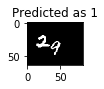

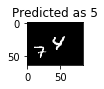

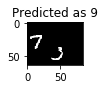

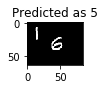

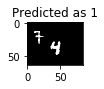

IndexError: index 5 is out of bounds for axis 0 with size 5

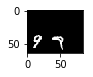

In [32]:
for i in range(len(X)):
    plt.figure(figsize=(1,1))
    plt.imshow(X[i].reshape([64,84]),cmap='gray')
    plt.title('Predicted as {}'.format(y_predicted[i]))
    plt.show()